In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
cd

/root


In [3]:
bd=pd.read_excel('/gdrive/MyDrive/CE/BDEX to UDM Data Mapping - May 13, 2021.xlsx')

In [4]:
bd['udm_user_found']=bd['UDM Consumer User ID'].map({'No Match Found': False}).fillna(True)

In [6]:
bd.Vendor.value_counts()

DI       182405
CSCGo     44307
Name: Vendor, dtype: int64

In [7]:
met_dict= {'email_address': 'count', 'udm_user_found': 'sum'}
bf= bd.loc[bd.Vendor=='DI'].groupby('Client Account AS400 ID').agg(met_dict).reset_index()
bf.columns=['as400id', 'emails', 'users_found']
bf['opportunity_size']= bf.emails- bf.users_found
bf['bdex']= 'Y'

In [8]:
len(bf.as400id.unique())

2215

In [15]:
mf= pd.read_csv('/gdrive/MyDrive/CE/nummc.csv')

In [17]:
mf.columns

Index(['client_account_id', 'machine_count'], dtype='object')

In [18]:
mf.columns=['as400id', 'machine_count']

In [19]:
bf= bf.loc[bf.opportunity_size > 9]

In [20]:
bf.shape

(1826, 5)

In [21]:
bf.merge(mf, how='inner', on= 'as400id').shape

(1814, 6)

In [22]:
df=pd.read_csv('/gdrive/MyDrive/CE/uupm.csv')
df.columns= ['as400id', 'payment_type', 'weeknum', 'uniq_transactors', 'amt']

In [23]:
ditch=[]
for a in df.as400id:
  try:
    int(a)
  except:
    ditch.append(a)
ditch.append('-303934')
ditch.append('0')
ditch.append('000000000')
ditch.append('999999999')
ditch = set(ditch)

In [24]:
ditch

{'\x03313659',
 '\x12314882',
 '\x13314882',
 '\x14201731',
 '\x14313904',
 '\x15108932',
 ',303934',
 '-303934',
 '0',
 '000000000',
 '11076 20210125000700',
 '14415  2021031200082',
 '1597     20210303001',
 '201522 2021012401104',
 '2101878 202103210005',
 '2101878 202103210029',
 '2101878 202103270005',
 '2120047  20210220010',
 '2120047 202103020107',
 '2120047 202103060101',
 '2120047 202103260108',
 '2902     20210321000',
 '2902    202102080003',
 '2902    202103080003',
 '2906  20210326000639',
 '2960  20210319000418',
 '3009     20210314010',
 '3010     20210330010',
 '3010    202101100102',
 '3792     20210320020',
 '3792    202103180109',
 '3792    202103210105',
 '3792    202103220104',
 '3792    202103280002',
 '4\x1413904',
 '4(03934',
 '4,03934',
 '40874   202101200005',
 '4225287 202102221302',
 '43\x147258',
 '43\x158135',
 '43,3934',
 '43112\x138',
 '43112\x148',
 '43112 8',
 '43278\x146',
 '4328?ÿÿÿÿÿ000030',
 '5\x14131',
 '503354   20210321000',
 '59131;',
 '6\x152

In [25]:
df1=df.loc[~df.as400id.isin(ditch)]

In [26]:
len(df1.as400id.unique())

13803

In [27]:
df11=df1.loc[df.weeknum <= 16].groupby('as400id')['uniq_transactors', 'amt'].sum().divide(16)
df11.columns=['UniqTxntrAll', 'AmtAll']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [28]:
df12=df1.loc[(df.weeknum <= 16) & (df.payment_type=='App')].groupby('as400id')['uniq_transactors', 'amt'].sum().divide(16)
df12.columns=['UniqTxntrApp', 'AmtApp']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [29]:
df2=pd.concat([df11,df12], axis=1, join='outer').fillna(0).reset_index()
df2.columns= ['as400id', 'UniqTxntrAll', 'AmtAll', 'UniqTxntrApp', 'AmtApp']

In [30]:
import numpy as np
df2['UnitVendAlldollar']= df2.AmtAll/(np.where(df2.UniqTxntrAll==0, 1, df2.UniqTxntrAll)*100.0)
df2['UnitVendAppdollar']= df2.AmtApp/(np.where(df2.UniqTxntrApp==0, 1, df2.UniqTxntrApp)*100.0)

In [31]:
bf.dtypes

as400id             object
emails               int64
users_found          int64
opportunity_size     int64
bdex                object
dtype: object

In [32]:
bf.as400id= bf.as400id.astype(str)

In [33]:
mf.dtypes

as400id          object
machine_count     int64
dtype: object

In [34]:
mf.as400id= mf.as400id.astype(str)

In [35]:
df2.dtypes

as400id               object
UniqTxntrAll         float64
AmtAll               float64
UniqTxntrApp         float64
AmtApp               float64
UnitVendAlldollar    float64
UnitVendAppdollar    float64
dtype: object

In [36]:
df3=bf.merge(mf, how='inner', on= 'as400id').merge(df2, how='inner', on='as400id')

In [37]:
len(df3.as400id)

1763

In [39]:
df3.opportunity_size.sum()

168775

In [ ]:
cd

/root


In [ ]:
df3.to_csv('/content/cohort1.csv')

In [40]:
df3.opportunity_size.sum()

168775

In [41]:
df3.head()

,as400id,emails,users_found,opportunity_size,bdex,machine_count,UniqTxntrAll,AmtAll,UniqTxntrApp,AmtApp,UnitVendAlldollar,UnitVendAppdollar
0,10824,14,2,12,Y,4,7.6250,6878.1250,7.6250,6437.5000,9.020492,8.442623
1,1100318,162,6,156,Y,12,11.8125,12281.2500,5.3750,5681.2500,10.396825,10.569767
2,1100331,51,3,48,Y,6,6.6875,7771.8750,1.6250,1479.6875,11.621495,9.105769
3,1100690,28,0,28,Y,16,46.6875,41767.1875,22.5625,21192.1875,8.946118,9.392659
4,1100695,69,3,66,Y,6,0.8125,3481.2500,0.8125,710.9375,42.846154,8.750000


In [42]:
df3['AlltxntrperMc']= df3.UniqTxntrAll/df3.machine_count

In [43]:
df3.AlltxntrperMc.describe()

count    1763.000000
mean        1.434576
std         1.100463
min         0.000000
25%         0.609375
50%         1.234375
75%         1.983803
max         7.505208
Name: AlltxntrperMc, dtype: float64

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
AlltxntrperMc,1763,1.43458,1.10046,0,0.609375,1.23438,1.9838,7.50521


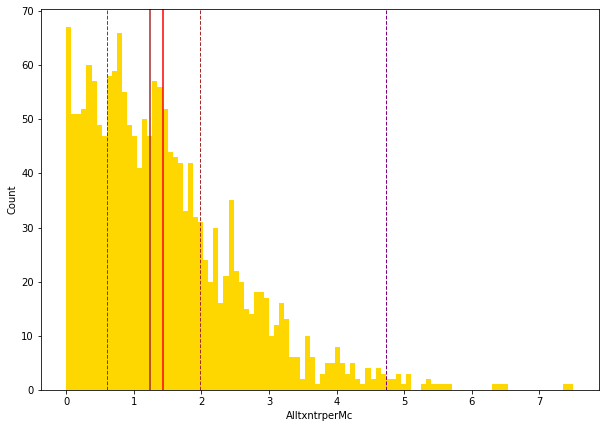

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df3.AlltxntrperMc, color='gold', bins=100,log=False, histtype='bar')
# plt.hist(df3.AlltxntrperMc.sample(frac=.4, replace=False, random_state=42, axis=0), color='orange', bins=100,log=False, histtype='bar')
plt.xlabel('AlltxntrperMc')
plt.ylabel('Count')
plt.axvline(df3.AlltxntrperMc.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df3.AlltxntrperMc.median(), color='brown', linestyle='solid', linewidth=1.5)
plt.axvline(df3.AlltxntrperMc.describe().loc['25%'], color='brown', linestyle='dashed', linewidth=1)
plt.axvline(df3.AlltxntrperMc.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
plt.axvline(df3.AlltxntrperMc.describe().loc['mean']+ 3*df3.AlltxntrperMc.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
# plt.axvline(df3.AlltxntrperMc.describe().loc['mean']- 3*df3.AlltxntrperMc.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
# # plt.axvline(df3.AlltxntrperMc.describe().loc['mean']- 3*df3.AlltxntrperMc.loc['std'], color='purple', linestyle='dashed', linewidth=1)
# plt.show()
df3.AlltxntrperMc.describe().reset_index().T

In [45]:
def add_campaignflag(df, col='AlltxntrperMc', splits=[.4,.4,.2]):
  np.random.seed(42)
  df['dec']= pd.qcut(df[col], 10, labels=np.arange(10, 0, -1))
  dfs=[]
  for i,d in enumerate(list(df3.dec.unique())):
    df1= df.loc[df.dec==d]
    ixs= np.arange(df1.shape[0])
    np.random.shuffle(ixs)
    # print(i,d,len(ixs))
    df1['camp_flag']= None
    start=0
    for i,s in enumerate(splits):
      stop= start+int(round(s*len(df1),0))
      df1.loc[:,'camp_flag'].iloc[start:stop]= 'split_'+str(i)
      start = stop
      # print(i,d,stop,start,df1.camp_flag.value_counts())
    # print(d,df1.camp_flag.value_counts())
    dfs.append(df1)
  df4= pd.concat(dfs, axis=0)
  return(df4)

In [46]:
df4=add_campaignflag(df3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

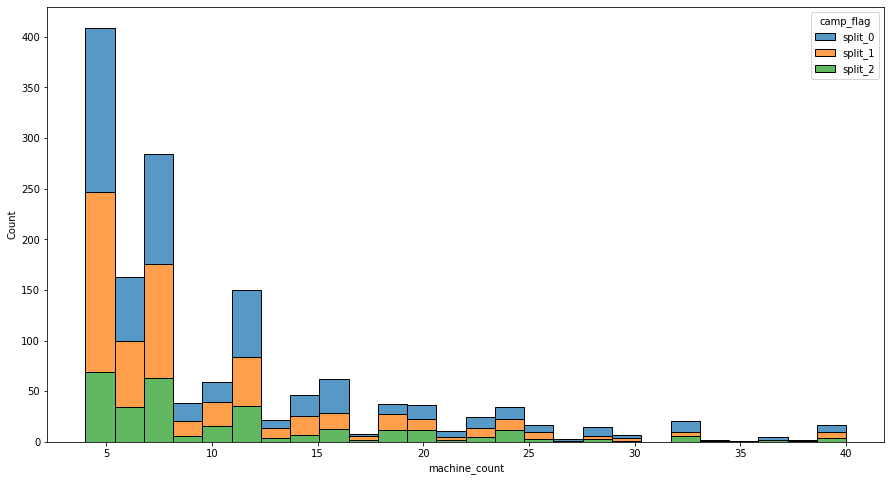

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=df4.loc[df4.machine_count.between(4,40)], x= 'machine_count', ax=ax, hue='camp_flag', multiple="stack")

In [48]:
df4.camp_flag= df4.camp_flag.map({'split_0': 'cohort1', 'split_1': 'cohort2', 'split_2':'control'})

In [49]:
df4.camp_flag.value_counts().sum()

1762

In [50]:
df4.groupby('dec')['AlltxntrperMc'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
dec,,,,,,,,
10,179.0,0.110334,0.075661,0.000000,0.035795,0.121094,0.178385,0.234375
9,177.0,0.363411,0.067288,0.238281,0.306818,0.367188,0.421875,0.468750
8,173.0,0.606016,0.070867,0.471154,0.545833,0.613636,0.664062,0.718750
7,179.0,0.834002,0.066026,0.721875,0.781250,0.826923,0.890625,0.953125
6,178.0,1.101240,0.083417,0.956250,1.024279,1.115327,1.168106,1.234375
5,172.0,1.364894,0.069979,1.235417,1.304036,1.366536,1.421875,1.487500
4,176.0,1.632704,0.089879,1.492188,1.558490,1.625000,1.711328,1.801339
3,178.0,2.006450,0.134264,1.802083,1.886230,1.984375,2.132812,2.250000
2,174.0,2.557238,0.178217,2.253472,2.421875,2.531250,2.703125,2.890625


In [51]:
df4.columns

Index(['as400id', 'emails', 'users_found', 'opportunity_size', 'bdex',
       'machine_count', 'UniqTxntrAll', 'AmtAll', 'UniqTxntrApp', 'AmtApp',
       'UnitVendAlldollar', 'UnitVendAppdollar', 'AlltxntrperMc', 'dec',
       'camp_flag'],
      dtype='object')

In [52]:
df4.groupby(['camp_flag'])['AlltxntrperMc'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
camp_flag,,,,,,,,
cohort1,706.0,1.419364,1.067136,0.0,0.580492,1.230469,1.963024,6.406250
cohort2,706.0,1.437400,1.109481,0.0,0.625000,1.233259,1.989070,7.505208
control,350.0,1.459155,1.151497,0.0,0.625000,1.233507,1.996094,7.390625


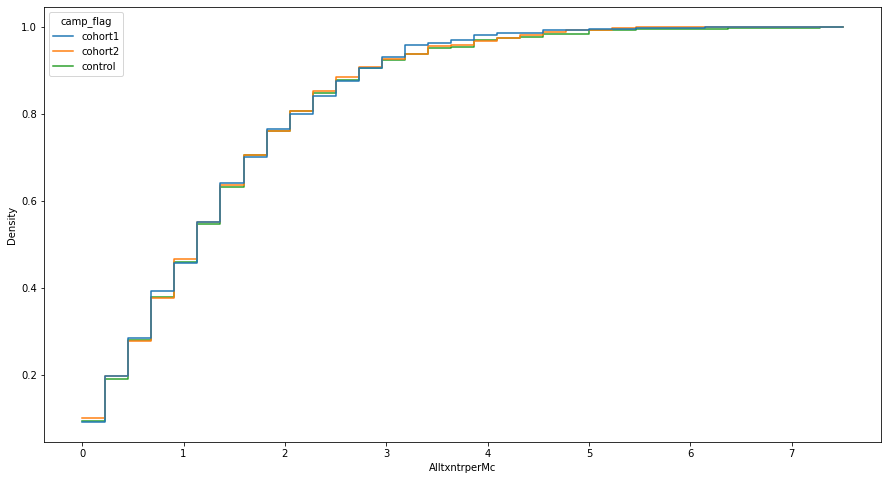

In [53]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(
    data=df4, x="AlltxntrperMc", hue="camp_flag",
    hue_order=["cohort1", "cohort2", "control"],
    log_scale=False, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,ax=ax
)

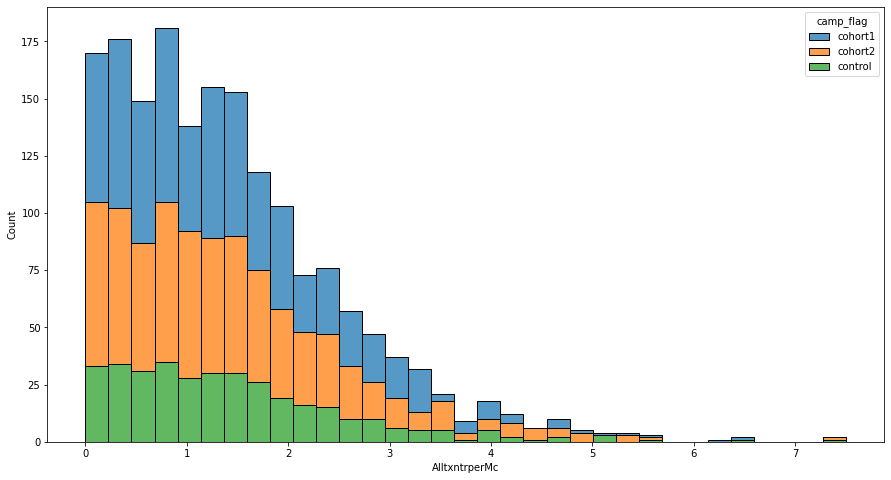

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=df4, x="AlltxntrperMc", hue="camp_flag", multiple="stack", ax=ax)

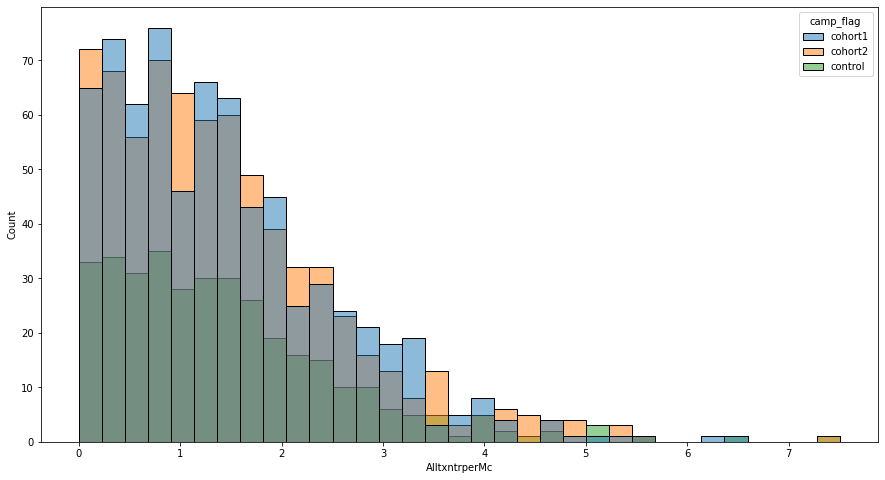

In [55]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=df4, x="AlltxntrperMc", hue="camp_flag", multiple="layer",ax=ax)

In [56]:
df4.head()

,as400id,emails,users_found,opportunity_size,bdex,machine_count,UniqTxntrAll,AmtAll,UniqTxntrApp,AmtApp,UnitVendAlldollar,UnitVendAppdollar,AlltxntrperMc,dec,camp_flag
0,10824,14,2,12,Y,4,7.6250,6878.1250,7.6250,6437.5000,9.020492,8.442623,1.906250,3,cohort1
10,1101128,17,2,15,Y,6,12.7500,18026.5625,7.1250,7660.9375,14.138480,10.752193,2.125000,3,cohort1
35,1501219,17,2,15,Y,8,16.7500,18028.1250,9.9375,11123.4375,10.763060,11.193396,2.093750,3,cohort1
44,1520291,70,1,69,Y,6,11.0000,6575.0000,2.5000,1471.8750,5.977273,5.887500,1.833333,3,cohort1
49,1520624,191,4,187,Y,11,20.3125,17443.7500,20.3125,17443.7500,8.587692,8.587692,1.846591,3,cohort1


In [63]:
met_dict1= {'opportunity_size': 'sum','as400id': 'nunique', 'UniqTxntrAll': 'sum', 'machine_count':'sum','AlltxntrperMc': 'std'}

In [64]:
df5=df4.groupby('camp_flag').agg(met_dict1)
df5['AlltxntrperMcMean']= df5.UniqTxntrAll/ df5.machine_count

In [65]:
df5

,opportunity_size,as400id,UniqTxntrAll,machine_count,AlltxntrperMc,AlltxntrperMcMean
camp_flag,,,,,,
cohort1,77573,706,13397.3125,8270,1.067136,1.619989
cohort2,58928,706,10663.6250,7416,1.109481,1.437921
control,32251,350,7248.0000,4845,1.151497,1.495975


In [57]:
df6=df4.groupby(['camp_flag'])['AlltxntrperMc'].agg('describe')

In [58]:
df6

,count,mean,std,min,25%,50%,75%,max
camp_flag,,,,,,,,
cohort1,706.0,1.419364,1.067136,0.0,0.580492,1.230469,1.963024,6.406250
cohort2,706.0,1.437400,1.109481,0.0,0.625000,1.233259,1.989070,7.505208
control,350.0,1.459155,1.151497,0.0,0.625000,1.233507,1.996094,7.390625


In [60]:
tcats=['cohort1', 'cohort2']
tcon= 'control'
A_size= df6.loc['control', 'count']
A_Mean= df6.loc['control', 'mean']
A_var= df6.loc['control','std']**2

In [67]:
# from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import TTestIndPower
alpha=0.05
result=[]
for mean_incr in [.01,.05,.075, 0.1, .125, .15, .2]:
  for t in tcats:
    B_size= df6.loc[t, 'count']
    B_Mean= df6.loc[t, 'mean']
    B_NewMean= B_Mean*(1+mean_incr)
    B_machines= df5.loc[t, 'machine_count']
    IncrVend= mean_incr*B_Mean*df5.loc[t,'machine_count']
    ConvReq= IncrVend/df5.loc[t,'opportunity_size']
    B_var= df6.loc[t,'std']**2
    s= np.sqrt(((A_size-1)*A_var+(B_size-1)*B_var)/(A_size+B_size-2))
    d= abs((B_NewMean- A_Mean)/s)
    p_analysis = TTestIndPower()
    power= p_analysis.solve_power(effect_size=d, nobs1=B_size, alpha=alpha, ratio=B_size/A_size, alternative= 'two-sided')
    print(t,B_NewMean, A_Mean, s, d,power)
    print('____________________________________________________________________________________________________')
    result.append([mean_incr,t,B_Mean,B_NewMean,B_machines,d, IncrVend,ConvReq, power])

cohort1 1.4335579476569738 1.4591545623822835 1.095788873252084 0.023359075228920737 0.07996148545808182
____________________________________________________________________________________________________
cohort2 1.4517744264276438 1.4591545623822835 1.1235677863567526 0.006568483045042008 0.05233396581449348
____________________________________________________________________________________________________
cohort1 1.4903325198414084 1.4591545623822835 1.095788873252084 0.028452522397489667 0.09475393442719357
____________________________________________________________________________________________________
cohort2 1.5092704433158672 1.4591545623822835 1.1235677863567526 0.04460423442370845 0.16246104467687017
____________________________________________________________________________________________________
cohort1 1.5258166274566798 1.4591545623822835 1.095788873252084 0.060834770913995986 0.2619658085933868
_______________________________________________________________________

In [68]:
df7=pd.DataFrame.from_records(result)
df7.columns=['Delta%- Mean Value', 'Campaign Cohort', 'Original Mean','Increased Mean', '# Machines', 'Effct Size', 'Incremental Vends', 'Required Conversion%', 'power']

In [69]:
df7

,Delta%- Mean Value,Campaign Cohort,Original Mean,Increased Mean,# Machines,Effct Size,Incremental Vends,Required Conversion%,power
0,0.010,cohort1,1.419364,1.433558,8270,0.023359,117.381428,0.001513,0.079961
1,0.010,cohort2,1.437400,1.451774,7416,0.006568,106.597615,0.001809,0.052334
2,0.050,cohort1,1.419364,1.490333,8270,0.028453,586.907140,0.007566,0.094754
3,0.050,cohort2,1.437400,1.509270,7416,0.044604,532.988077,0.009045,0.162461
4,0.075,cohort1,1.419364,1.525817,8270,0.060835,880.360710,0.011349,0.261966
5,0.075,cohort2,1.437400,1.545205,7416,0.076587,799.482115,0.013567,0.383452
6,0.100,cohort1,1.419364,1.561301,8270,0.093217,1173.814280,0.015132,0.525677
7,0.100,cohort2,1.437400,1.581140,7416,0.108570,1065.976153,0.018089,0.654593
8,0.125,cohort1,1.419364,1.596785,8270,0.125599,1467.267850,0.018915,0.778618
9,0.125,cohort2,1.437400,1.617075,7416,0.140553,1332.470191,0.022612,0.862642


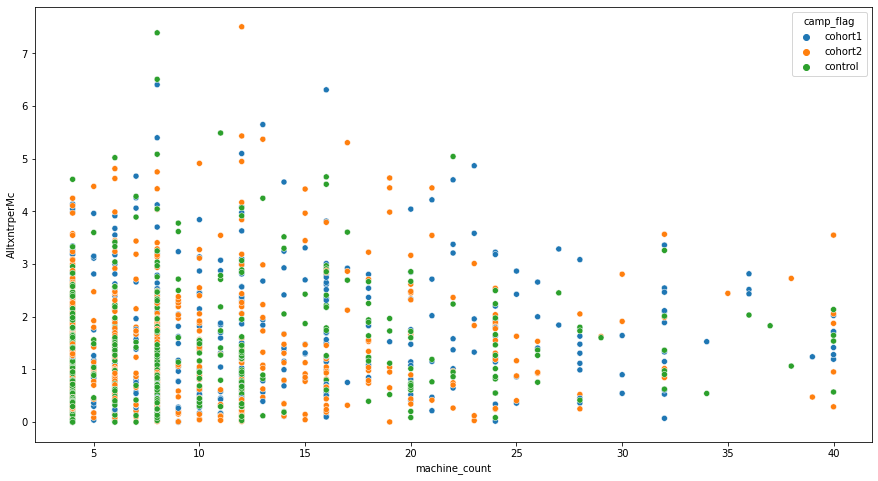

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=df4.loc[df4.machine_count.between(4,40)], x='machine_count',y='AlltxntrperMc', hue='camp_flag')

# Other Stuff

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.15, frac_test=0.25,
                                         random_state=None):
    '''
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    '''

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return(df_train, df_val, df_test)

In [ ]:
import pandas as pd

positions = {"least": 0.277220, "left": 0.250000, "right": 0.250000, "left-center": 0.141244, "right-center": 0.081536}
data = [['title-{}-{}'.format(i, position), position] for i in range(1000) for position in positions.keys()]
frame = pd.DataFrame(data=data, columns=['title', 'position'])
print(frame.shape)


def sample(obj, replace=False, total=1000):
    return obj.sample(n=int(positions[obj.name] * total), replace=replace)

result = frame.groupby('position', as_index=False).apply(sample).reset_index(drop=True)
print(result.groupby('position').agg('count'))

In [ ]:
bd['UDM Consumer User ID'].value_counts()

No Match Found    219536
379430                 1
174187                 1
1339778                1
1130853                1
                   ...  
794732                 1
782415                 1
15094                  1
330472                 1
1067340                1
Name: UDM Consumer User ID, Length: 7177, dtype: int64

In [ ]:
len(bd.loc[bd['Client Account AS400 ID'].isin(df4.loc[df4.camp_flag=='control'].as400id.tolist())]['email_address'])

33731

In [ ]:
bd.loc[bd['Client Account AS400 ID'].isin(df4.loc[df4.camp_flag=='cohort1'].as400id.tolist())]['email_address'].to_csv('/content/email_co1.csv')

In [ ]:
bd.loc[bd['Client Account AS400 ID'].isin(df4.loc[df4.camp_flag=='cohort2'].as400id.tolist())]['email_address'].to_csv('/content/email_co2.csv')

In [ ]:
bd.loc[bd['Client Account AS400 ID'].isin(df4.loc[df4.camp_flag=='control'].as400id.tolist())]['email_address'].to_csv('/content/email_control.csv')

In [ ]:
%ls '/content/'

cohort1.csv  email_co1.csv  email_co2.csv  email_control.csv  sample_data/


In [ ]:
df4.loc[df4.camp_flag=='cohort1'].as400id.tolist()

In [ ]:
%cd '/content'

/content


In [ ]:
%cp /content/email_co1.csv '/gdrive/MyDrive/CE/email_co10525.csv'
%cp /content/email_co2.csv '/gdrive/MyDrive/CE/email_co220525.csv'
%cp /content/email_control.csv '/gdrive/MyDrive/CE/email_cntrl0525.csv'